In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

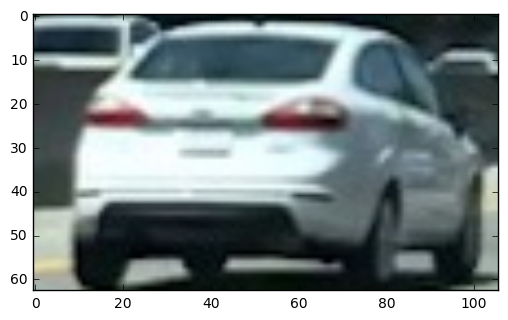

In [3]:
image = mpimg.imread("cutout1.jpg")
plt.imshow(image)
plt.show()

In [4]:
# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))

In [11]:
# Generating bin centers
bin_edges = rhist[1]
bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2

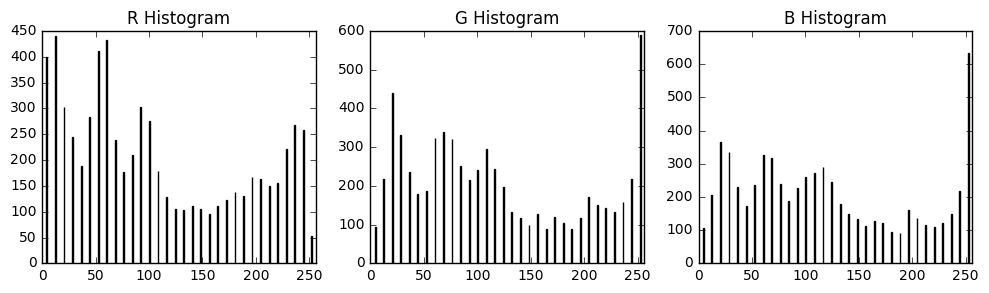

In [12]:
# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

In [13]:
hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))

In [17]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], nbins, bins_range)
    ghist = np.histogram(img[:,:,1], nbins, bins_range)
    bhist = np.histogram(img[:,:,2], nbins, bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:] + bin_edges[0: len(bin_edges) - 1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

In [18]:
color_hist(image)

((array([400, 441, 302, 244, 189, 283, 412, 433, 239, 177, 209, 302, 276,
         179, 129, 106, 104, 111, 106,  96, 111, 123, 139, 130, 167, 164,
         149, 156, 222, 268, 258,  53]),
  array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
           72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
          144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
          216.,  224.,  232.,  240.,  248.,  256.])),
 (array([ 95, 219, 441, 331, 235, 179, 188, 324, 340, 321, 252, 215, 242,
         296, 244, 198, 133, 117,  98, 127,  88, 120, 104,  88, 117, 172,
         152, 142, 133, 159, 219, 589]),
  array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
           72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
          144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
          216.,  224.,  232.,  240.,  248.,  256.])),
 (array([106, 206, 367, 337, 230, 174, 235, 328, 316, 238, 189, 227, 261,
        